## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].count()
mice_count


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = combined_df[combined_df.duplicated(['Mouse ID'])]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = combined_df.drop_duplicates("Mouse ID")
clean_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_results['Mouse ID'].nunique()
clean_mouse_count


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median,"Variance": variance,"Standard Deviation": standard_dv,"SEM": sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_groupby = combined_df.groupby('Drug Regimen')
summary_df_2 = single_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

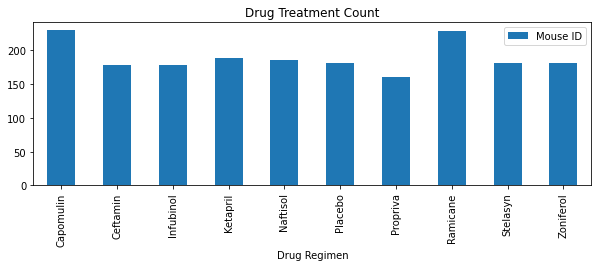

<Figure size 432x288 with 0 Axes>

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
#Alter the dataframe down to two columns
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

#Creating the bar chart
drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")


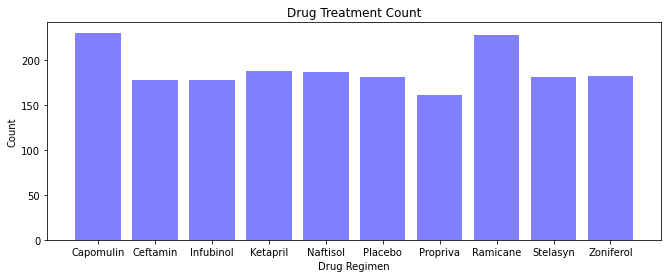

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_list = summary_df.index.tolist()
drug_list

#Turn drug_count into a list
drug_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

x_axis = np.arange(len(drug_count)) 
#Assign x-axis
x_axis = drug_list
#Creating and customizing bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='b', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()



,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [59]:
#Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

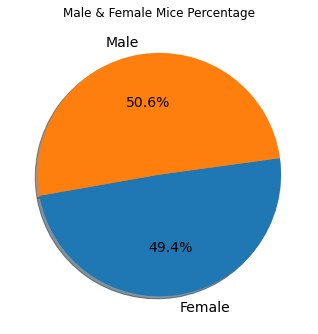

In [61]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

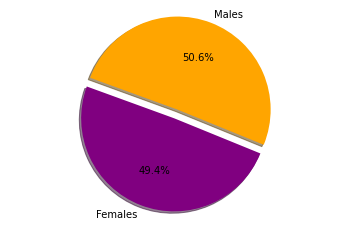

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

#Chart Details
labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0)

#Creating Pie Chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

# Quartiles, Outliers and Boxplots

In [95]:
# Final tumor volume of each mouse across four of the most promising treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine 
# if there are any potential outliers across all four treatment regimens.

Capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [96]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [99]:
# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")

In [100]:
# Ramicane quartiles and IQR
# Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [102]:
# Infubinol 
# Determine outliers using upper and lower bounds

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [103]:
# Infubinol quartiles and IQR
# Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge.to_csv("output.csv")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [105]:
# Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combined_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [106]:
# Ceftamin quartiles and IQR
# Determine outliers using upper and lower bounds

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


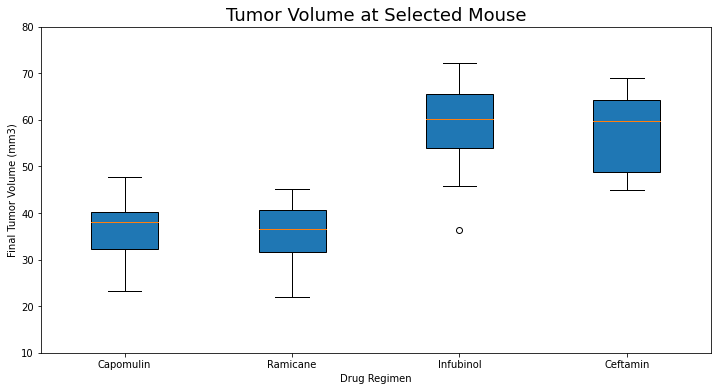

In [107]:
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =18)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

# Line and Scatter Plots

In [129]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [131]:
#Data from one mouse

capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


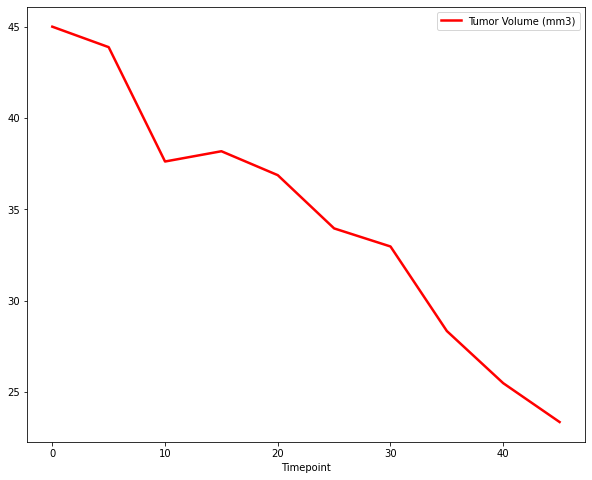

In [132]:
#Arrange data into two columns
capo_mouse = capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#Now reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capo_mouse = capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="red") 


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()
 

In [136]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [137]:
#3 columns combined
weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [138]:
# Get the average tumor volume for each mouse under the use of Capomulin
avg_capo = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [139]:
#Rename "Tumor Volume (mm3)" column to "Average Volume"
avg_capo = avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


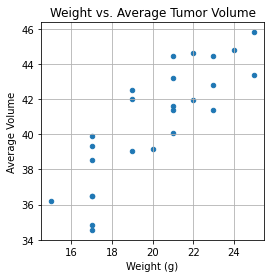

<Figure size 432x288 with 0 Axes>

In [166]:
#Creating the scatter plot of mouse wight compared to the average tumor volume for Capomulin

avg_capo.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()



## Correlation and Regression

In [161]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(weight_df['Weight (g)'],weight_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.53


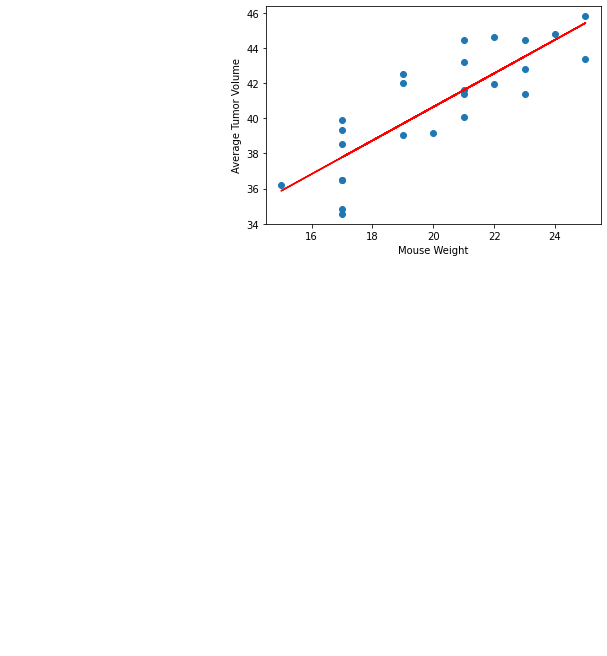

<Figure size 432x288 with 0 Axes>

In [163]:
# import linregress
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_capo["Weight (g)"]
y_values = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show() 

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()